In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import warnings

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
dataConfirmed = pd.read_csv('Time.csv')
dataConfirmed

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [3]:
dataConfirmed.head(10)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0


In [5]:
dataConfirmed['percentage_positive'] = dataConfirmed['confirmed']/dataConfirmed['test']
dataConfirmed['date'] =  pd.to_datetime(dataConfirmed['date'])
dataConfirmed['date_delta'] = (dataConfirmed['date'] - dataConfirmed['date'].min())  / np.timedelta64(1,'D')
dataConfirmed = dataConfirmed[dataConfirmed['percentage_positive'] < 0.05] #remove outliers

dataConfirmed["date_14"] = ""
for index, row in dataConfirmed.iterrows():
    day_retract = row['date'] - timedelta(14)
    dataConfirmed['date_14'][index] = day_retract

<ipython-input-5-b7ea0b69cc29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataConfirmed["date_14"] = ""
<ipython-input-5-b7ea0b69cc29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataConfirmed['date_14'][index] = day_retract
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec

<AxesSubplot:title={'center':'percentage confirmed'}, xlabel='date_delta', ylabel='percentage_positive'>

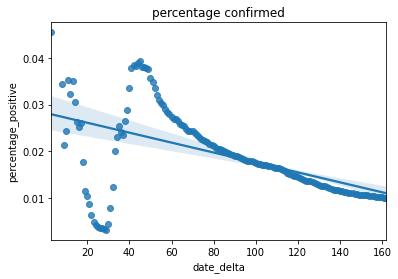

In [6]:
plt.title("percentage confirmed")
sns.regplot(x="date_delta", y="percentage_positive", data=dataConfirmed)

<AxesSubplot:title={'center':'number of tests'}, xlabel='date_delta', ylabel='test'>

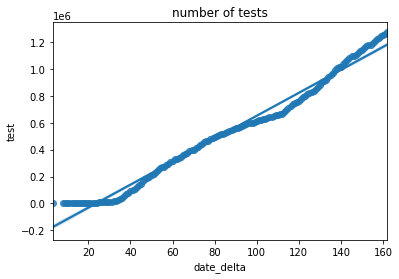

In [7]:
plt.title("number of tests")
sns.regplot(x="date_delta", y="test", data=dataConfirmed)

# Normalize data and test for normality

<ipython-input-8-566689a43f97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataConfirmed['percentage_positive_sqrt'] = np.sqrt(dataConfirmed['percentage_positive'])


[0.01282981]
[0.78234648]


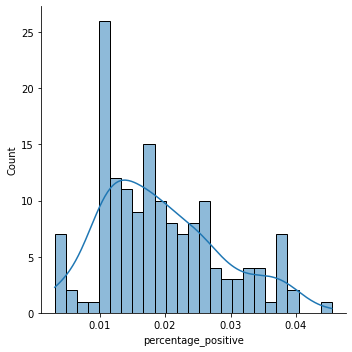

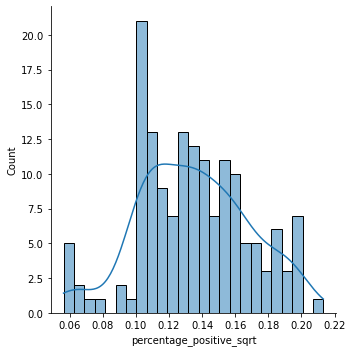

In [8]:
sns.displot(data=dataConfirmed, x="percentage_positive", bins=25, kde=True)

dataConfirmed['percentage_positive_sqrt'] = np.sqrt(dataConfirmed['percentage_positive'])
sns.displot(data=dataConfirmed, x="percentage_positive_sqrt", bins=25, kde=True)

# null hypothesis: x comes from a normal distribution
k2, p = stats.normaltest(dataConfirmed[['percentage_positive']])
k2, p2 = stats.normaltest(dataConfirmed[['percentage_positive_sqrt']])
print(p)
print(p2)

In [9]:
dataWeather = pd.read_csv('Weather.csv') 
dataWeather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [10]:
dataWeather.head(10)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
5,15000,Daejeon,2016-01-01,1.6,-4.2,7.7,0.0,4.4,320.0,77.4
6,16000,Ulsan,2016-01-01,4.0,-1.6,12.0,0.0,2.7,320.0,53.3
7,20000,Gyeonggi-do,2016-01-01,1.6,-4.2,5.7,0.0,2.1,180.0,80.1
8,30000,Gangwon-do,2016-01-01,5.1,2.1,8.9,0.0,9.6,290.0,33.0
9,40000,Chungcheongbuk-do,2016-01-01,-1.0,-5.9,4.1,0.0,1.6,110.0,79.4


In [11]:
data_weeks_mean = pd.DataFrame(columns = ['date', 'mean_avg_temp', 'mean_min_temp', 
                                          'mean_max_temp', 'mean_precipitation', 
                                          'mean_max_wind_speed', 'mean_most_wind_direction', 
                                          'mean_avg_relative_humidity', 'day', 'week'])

mean = dataWeather.groupby(['date'])['avg_temp'].mean()
data_weeks_mean['date'] = mean.index
data_weeks_mean['mean_avg_temp'] = mean.values
data_weeks_mean['date'] =  pd.to_datetime(data_weeks_mean['date'])
data_weeks_mean['day'] = (data_weeks_mean['date'] - data_weeks_mean['date'].min())  / np.timedelta64(1,'D')

mean = dataWeather.groupby(['date'])['min_temp'].mean()
data_weeks_mean['mean_min_temp'] = mean.values

mean = dataWeather.groupby(['date'])['max_temp'].mean()
data_weeks_mean['mean_max_temp'] = mean.values

mean = dataWeather.groupby(['date'])['precipitation'].mean()
data_weeks_mean['mean_precipitation'] = mean.values

mean = dataWeather.groupby(['date'])['max_wind_speed'].mean()
data_weeks_mean['mean_max_wind_speed'] = mean.values

mean = dataWeather.groupby(['date'])['most_wind_direction'].mean()
data_weeks_mean['mean_most_wind_direction'] = mean.values

mean = dataWeather.groupby(['date'])['avg_relative_humidity'].mean()
data_weeks_mean['mean_avg_relative_humidity'] = mean.values

for index, row in data_weeks_mean.iterrows():
    week = row['day']//7
    data_weeks_mean['week'][index] = week

<ipython-input-11-ed4f5ce1ac33>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_weeks_mean['week'][index] = week


# Merge percentage positive dataframe and weather dataframe

In [12]:
data_confirmed_merge = dataConfirmed[['date', 'date_14', 'percentage_positive_sqrt']]
data_total = data_confirmed_merge.merge(data_weeks_mean, on='date')

Text(0.5, 1.0, 'average temperature over time vs percentage positive')

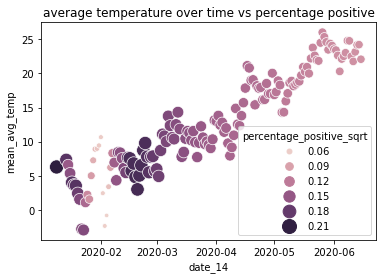

In [13]:
sns.scatterplot(x="date_14", y="mean_avg_temp", size="percentage_positive_sqrt", 
                sizes=(20, 200), hue="percentage_positive_sqrt", data=data_total)
plt.title("average temperature over time vs percentage positive")

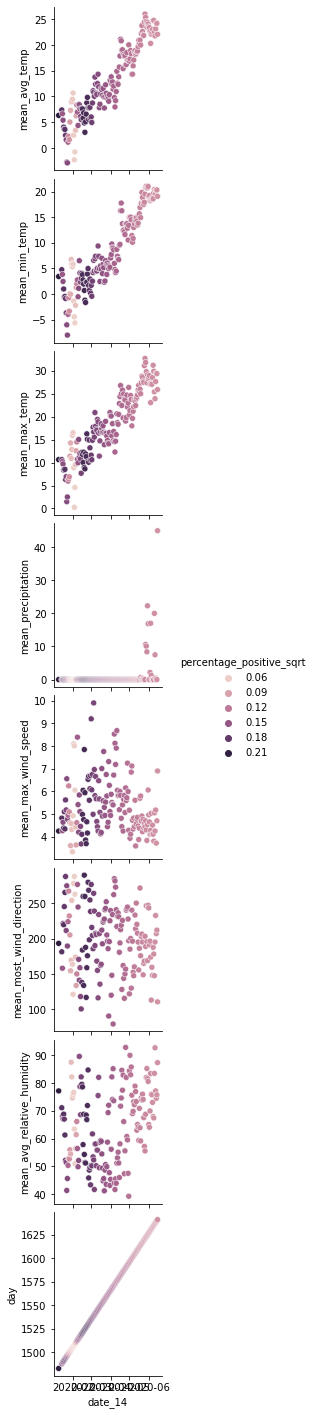

In [14]:
plot_df = data_total.drop(['week', 'date'], axis = 1)
sns.pairplot(plot_df, x_vars="date_14", hue="percentage_positive_sqrt")

Text(0.5, 1.0, 'pairplot of weather')

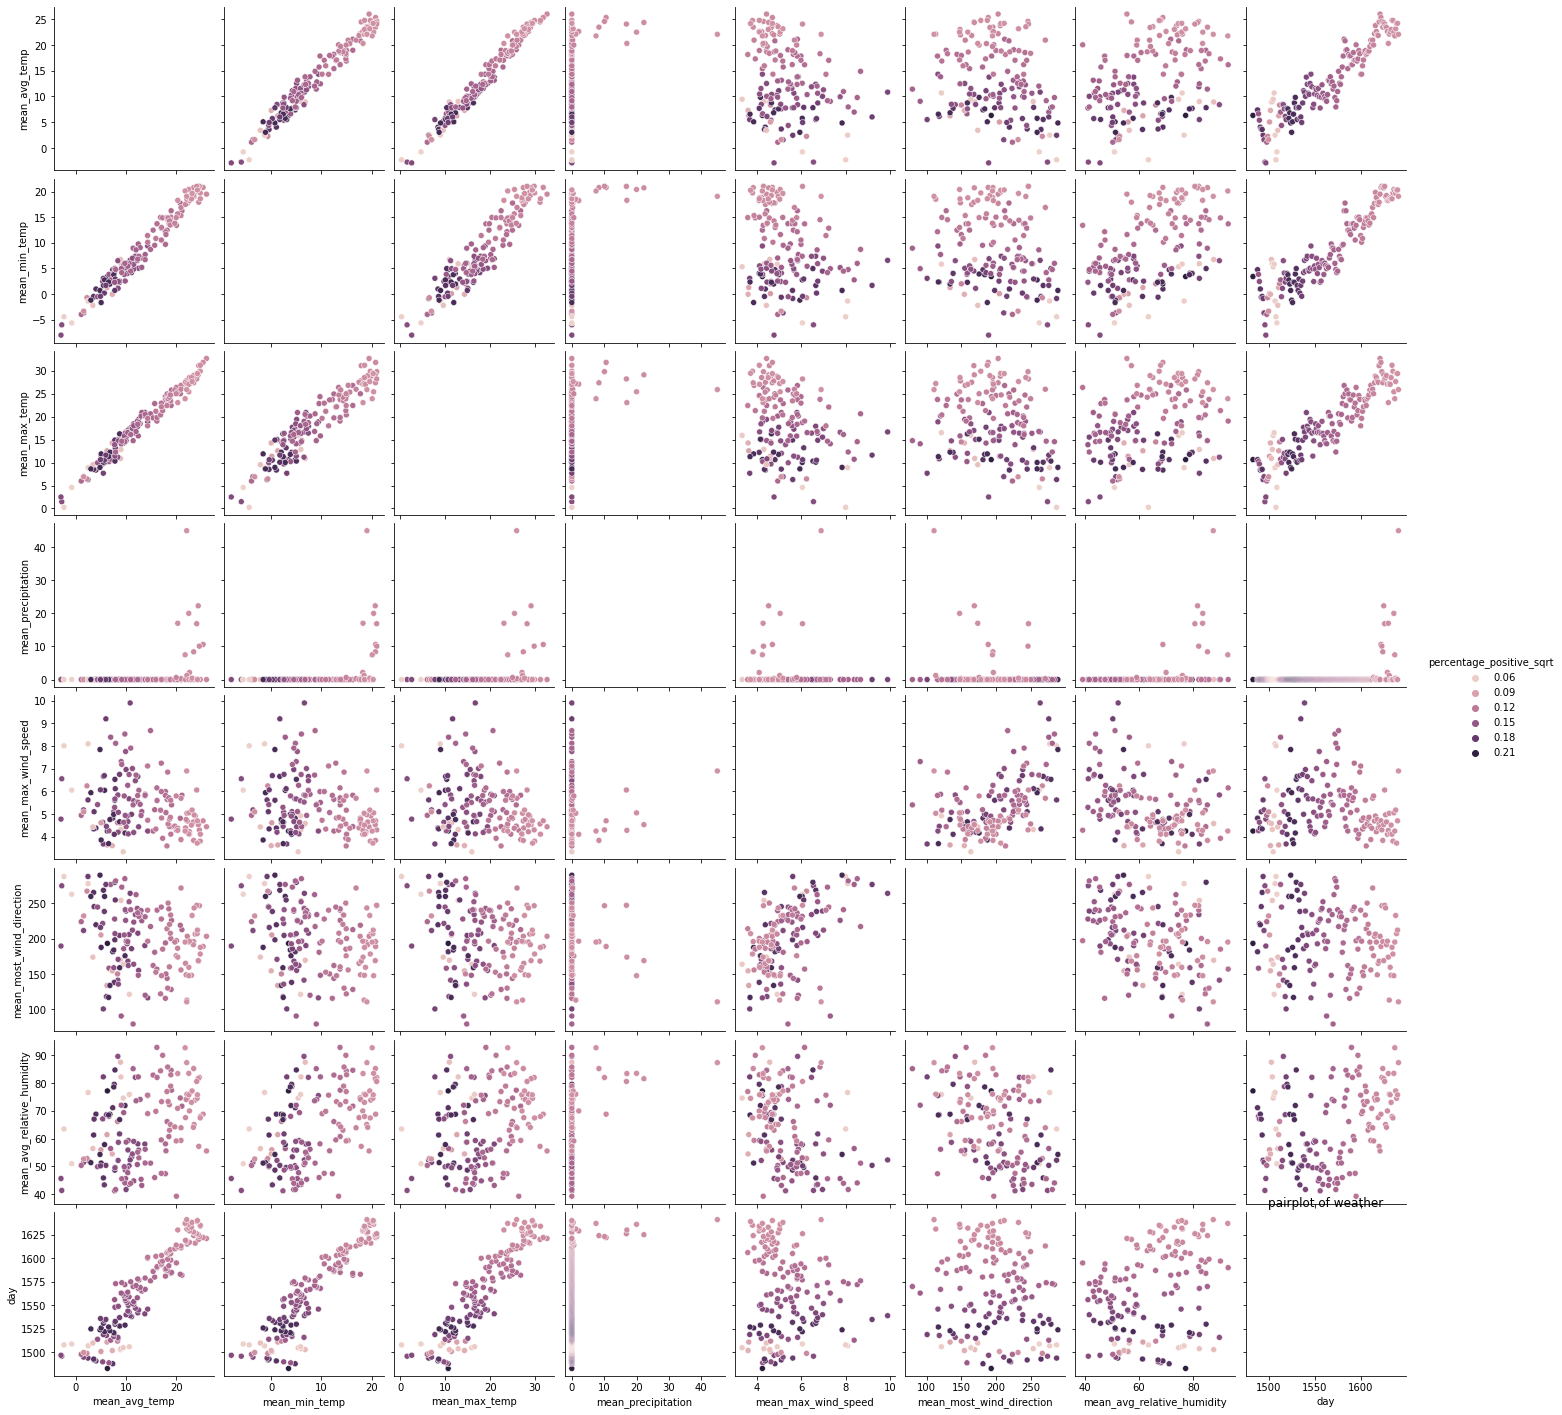

In [17]:
plot_data = data_total.drop(['week', 'date'], axis = 1)
sns.pairplot(plot_data, hue="percentage_positive_sqrt")
plt.title("pairplot of weather")

Text(0.5, 1.0, 'percentage positive compared to mean average temperature per week')

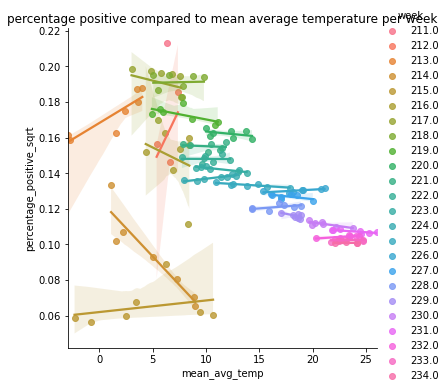

In [18]:
sns.lmplot(x="mean_avg_temp", y="percentage_positive_sqrt", hue="week", data=data_total);
plt.title("percentage positive compared to mean average temperature per week")

# Create functions for linear regression and t-test

In [21]:
def create_linear_regression_df(column):
    grouped = data_total.groupby(['week'])
    lin_reg_df = pd.DataFrame(columns=[column, 'slope', 'type'])
    lin_reg_14_df = pd.DataFrame(columns=[column, 'slope', 'type'])
    lin_reg_sub_df = pd.DataFrame(columns=[column, 'slope'])
    
    q = 0
    for name, group in grouped:
        i = 1
        for index, row in group.iterrows():
            group.loc[index, 'day'] = i
            i = i + 1
        mean_week = group[[column]].mean().values
        mean_week = mean_week.tolist()[0]
        
        reg = LinearRegression().fit(group[['day']], group[['percentage_positive_sqrt']]) 
        x = reg.coef_[0].tolist()[0]
        
        lin_reg_df = lin_reg_df.append({column: mean_week, 'slope': x, 'type': "normal"}, ignore_index=True)
        if q > 1:
            lin_reg_14_df = lin_reg_14_df.append({column: mean_week, 'slope': x, 'type': "14_days_later"}, 
                                                 ignore_index=True)
        
        q = q + 1
        
    lin_reg_df.drop(lin_reg_df.tail(2).index,inplace=True) 
    lin_reg_sub_df['slope'] = lin_reg_14_df['slope'] - lin_reg_df['slope']
    lin_reg_sub_df[column] = lin_reg_df[column]
    
    return [lin_reg_df, lin_reg_14_df, lin_reg_sub_df]

In [22]:
def paired_t_test(lin_reg_df, lin_reg_14_df):
    p = stats.ttest_rel(lin_reg_df,lin_reg_14_df)[1]
    if p > 0.05:
        p = "p-value: " + str(p) + ", null hypothesis can not be rejected"
    else:
        p = "p-value: " + str(p) + ", null hypothesis can be rejected"
    return p

# No difference in slopes confirmed weeks vs two weeks later

In [23]:
lin_reg_df = create_linear_regression_df("mean_avg_temp") 
print(paired_t_test(lin_reg_df[0]['slope'], lin_reg_df[1]['slope']))

p-value: 0.5431824381370314, null hypothesis can not be rejected


# Effect of weather on regression of percentage positive after two week

Text(0.5, 1.0, 'Percentage positive')

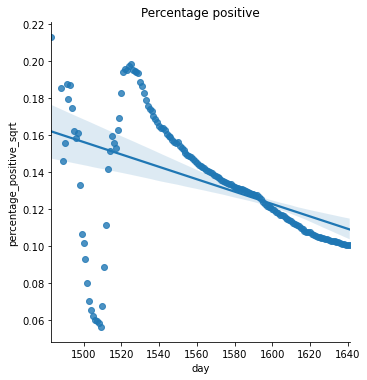

In [24]:
sns.lmplot(x="day", y="percentage_positive_sqrt", data=data_total);
plt.title("Percentage positive")

Text(0.5, 1.0, 'average temperature')

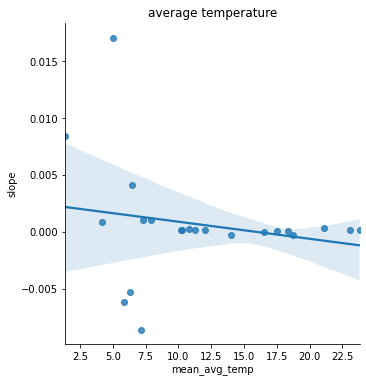

In [25]:
lin_reg_df = create_linear_regression_df("mean_avg_temp") 

sns.lmplot(x="mean_avg_temp", y="slope", data=lin_reg_df[2]);
plt.title("average temperature")

Text(0.5, 1.0, 'minimum temperature')

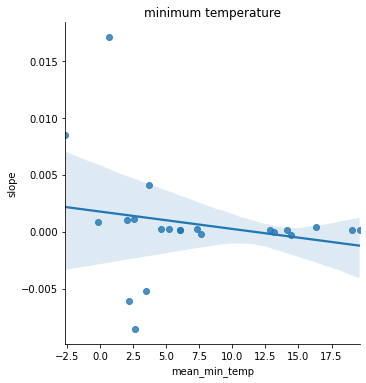

In [26]:
lin_reg_df = create_linear_regression_df("mean_min_temp") 

sns.lmplot(x="mean_min_temp", y="slope", data=lin_reg_df[2]);
plt.title("minimum temperature")

Text(0.5, 1.0, 'maximum temperature')

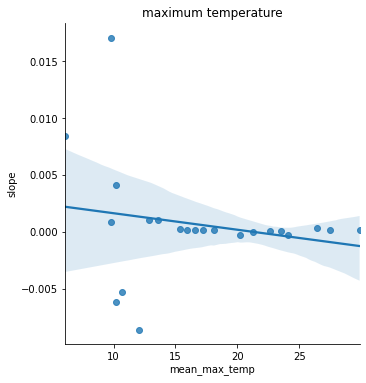

In [27]:
lin_reg_df = create_linear_regression_df("mean_max_temp") 

sns.lmplot(x="mean_max_temp", y="slope", data=lin_reg_df[2]);
plt.title("maximum temperature")

Text(0.5, 1.0, 'precipitation')

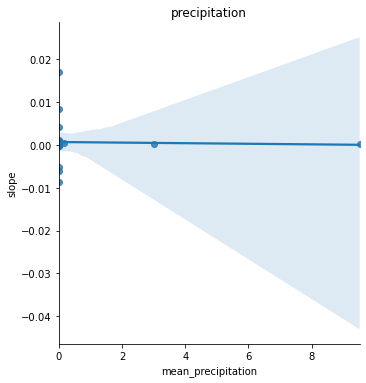

In [28]:
lin_reg_df = create_linear_regression_df("mean_precipitation") 

sns.lmplot(x="mean_precipitation", y="slope", data=lin_reg_df[2]);
plt.title("precipitation")

Text(0.5, 1.0, 'maximum wind speed')

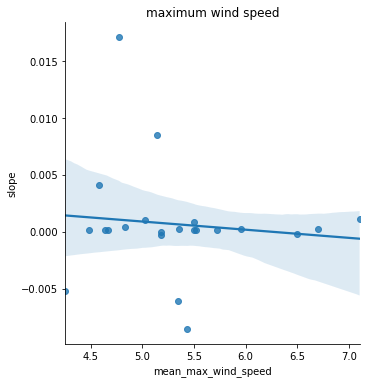

In [29]:
lin_reg_df = create_linear_regression_df("mean_max_wind_speed") 

sns.lmplot(x="mean_max_wind_speed", y="slope", data=lin_reg_df[2]);
plt.title("maximum wind speed")

Text(0.5, 1.0, 'most wind direction')

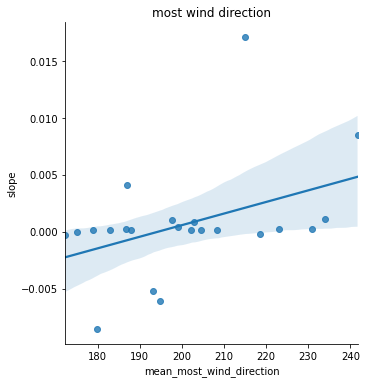

In [30]:
lin_reg_df = create_linear_regression_df("mean_most_wind_direction") 

sns.lmplot(x="mean_most_wind_direction", y="slope", data=lin_reg_df[2]);
plt.title("most wind direction")

Text(0.5, 1.0, 'mean average relative humidity')

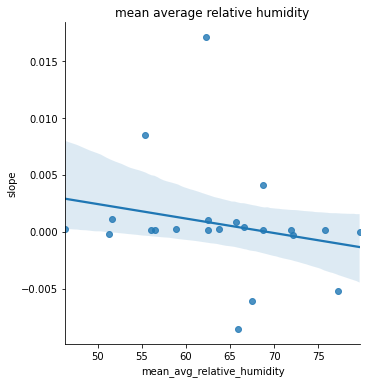

In [31]:
lin_reg_df = create_linear_regression_df("mean_avg_relative_humidity") 

sns.lmplot(x="mean_avg_relative_humidity", y="slope", data=lin_reg_df[2]);
plt.title("mean average relative humidity")

# k-means

date                          0
date_14                       0
percentage_positive_sqrt      0
mean_avg_temp                 0
mean_min_temp                 0
mean_max_temp                 0
mean_precipitation            0
mean_max_wind_speed           0
mean_most_wind_direction      0
mean_avg_relative_humidity    0
day                           0
week                          0
dtype: int64


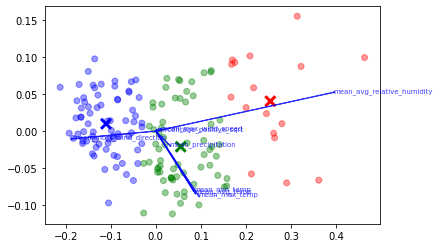

In [34]:
data_total_kmeans = data_total.drop(['date','week','day', 'date_14'], axis = 1)
print(data_total.isnull().sum())

T = preprocessing.Normalizer().fit_transform(data_total_kmeans)
n_clusters = 3
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_

#print(centroids)
#print(labels)

pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)

colors = ['blue', 'red', 'green']
#colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = data_total_kmeans.columns

for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.0005,
                head_width=0.002, alpha=0.75
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75, size="x-small")

plt.show()